## BVP1 Ejemplo 3 

Examinemos el ejemplo en 3 dimensiones en un paralelepípedo $\Omega$ con laterales $x_{m}=y_{m}=20km$ y $ z_{m}=5km$. Supongamos un campo inicial de la forma:

\begin{equation}
\mathbf{v}^{0}=u^{0}\mathbf{i}~~\text{donde}~~u^{0}=\beta e(y)f(z)g(x),
\end{equation}

donde $\beta$ es una constante obtenida con la velocidad promedio, 

$$\langle u^{0} \rangle = |\Omega|^{-1}\int_{\Omega}u^{0}d\Omega=10~ms^{-1}~~~\text{donde}~~~~|\Omega|=x_{M}y_{M}z_{M}.$$ 

Tenemos entonces, $F= \beta e(y)f(z)\partial_{x} g(x)$ y $F_{mnl}^{1}=\beta e_{n}(y)f_{l}(z)\partial_{x} g_{m}(x)$ donde, 

$$ e_{n}=\sum_{j=1}^{n}e_{j}\varphi_{j};~~~f_{l}=\sum_{k=1}^{l}f_{k}\tilde{\varphi}_{k};~~~\dot{g}_{m}=\sum_{i=1}^{m}\dot{g}_{i}\varphi_{i}. $$

La precisión con la que es aproximada la divergencia del campo $\mathbf{v}_{mnl}$, independiente de la matriz $\mathbb{S}=\{S_{j} \}$, está dado por: 

\begin{equation}
\nabla\cdot \mathbf{v}^{(1)}_{mnl}=F-F_{mnl}^{(1)}=\beta(ef\dot{g}-e_{n}f_{l}\dot{g}_{m}). 
\label{divergencia}
\end{equation}

Notamos que si alguna de las series $e_{n},f_{l}$ ó $\dot{g}_{m}$ no converge punto por punto a su función límite correcta en la frontera \textit{abierta} tendremos una divergencia no nula: 
$$ \nabla\cdot\mathbf{v}^{(1)}_{mnl}\neq 0 ~~~\text{sobre}~~~\Gamma_{D}=\Gamma_{x}\cup\Gamma_{y}\cup\Gamma_{z_{m}}~~~\forall~~m,n,l. $$

Además la divergencia $\nabla\cdot\mathbf{v}^{(1)}_{mnl}(x,y,z)$ puede aumentar mientras $(x,y,z)$ tienden a $\Gamma_{D}$; veamos como sucede. Consideremos el caso con $e=f=1$ donde $u^{0}=x$ y por tanto $\partial_{x}g=1$. De esta manera nos queda que $F=1$ por lo cual la convergencia de las series $e_{n},~f_{l},~\dot{g}_{m}$ deberá ser hacia la constante 1.

Las funciones $\dot{g}(x)$ y $e(y)$ satisfacen condiciones Dirichlet mientras que $f(z)$ satisface condiciones mixtas por lo tanto, la funciones base de su operador corresponden a:

\begin{align}
\varphi_{i}&=\sqrt{\frac{2}{b}}sin(\frac{i\pi}{b}x)  \\
\varphi_{j}&=\sqrt{\frac{2}{b}}sin(\frac{j\pi}{b}y)  \\
\tilde{\varphi}_{k}&=\sqrt{\frac{2}{b}}cos\left( (k+\tfrac{1}{2}) \frac{\pi}{b}z \right)  
\end{align}


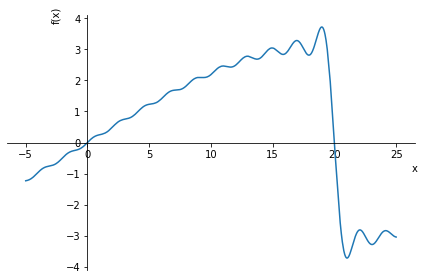

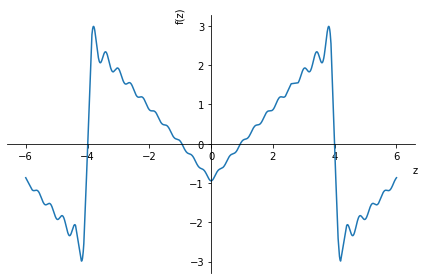

In [2]:
#Import all sympy module; enable us to work the equations 
#in the symbolic way. 
import sympy as sy
#Import also the symbolic variables 'n' and 'x'
from sympy.abc import x, y, z, m, n, l
import numpy as np
#from numpy import 
import matplotlib.pyplot as plt
#from math import exp

#Set a,b,c as parameters for limit of integration 
#and beta as mean velocity value with dimensions of [km*s^-1].

a=
b=20
c=4
beta=.010
H=10
#Set the number of coeficients in the Fourier series.
#enesima = 10

#Define the function f(x) as executable 
#def f(z):
f = z*exp(-z*0.1)
#    return f

#def dg(x):
dg = ((np.pi)/(2*a))*sy.sin((np.pi)/(2*a)*x)
#    return dg

#def e(y):
e = 1
#return e

def F(x,y,z):
    F = dg*e*f
    return F


#Base de condiciones Dirichlet normalizada; componente x
varphi_i=np.sqrt(2/a)*sy.sin((m*np.pi*x)/a)

#Base de condiciones Dirichlet normalizada; componente y
varphi_j=np.sqrt(2/b)*sy.sin((n*np.pi*y)/b)

#Base de condiciones Mixtas normalizada; componente z
varphi_k=np.sqrt(2/c)*sy.cos( ((1/2) + l)*(np.pi/c)*z )



#------------------Calculamos los coeficientes gi y ej----------------
#-----------considerando condiciones dirichlet en las laterales-------
#dgi1=integrate(dg*varphi_i,(x,0,a))

dgi1=(((-1)**m)*4*m*a)/((1-4*(m**2))*np.pi)

#ej1=integrate(e*varphi_j,(y,0,b))

ej1=(np.sqrt(2*b))*(1-((-1)**n))/(n*np.pi)

#-----------------Calculamos los coeficientes fk----------------------
#-----------considerando condiciones Mixtas en la vertical------------
#fk1=integrate(f*varphi_k,(z,0,c))


#-----------------Coeficiente fk----------------------
#------considerando condiciones Mixtas en la vertical------------
#---........Establacemos parámetros necesarios--------
                              
w2 = ((0.5)+l)*(np.pi/c)
gama = H/(1+(w2*H)**2)

#fk1=np.sqrt(2/c)*(((-1)**l)*gama*H*w2*exp(c/H)*(c+2*gama)-gama*(1+gama*H*w2))

#corregido
                              
fk1=np.sqrt(2/c)*gama*(((-1)**l)*c*H*w2*np.exp(-c/H)+gama*(1-(H*w2)**2))



#----------------------------SERIES&PLOTS------------------------------
#Usando el modulo para graficas de sympy

serie_dgm = 0
for i in range(0,20):
    serie_dgm = serie_dgm + ((varphi_i*dgi1).subs(m,i))    
sy.plot(serie_dgm,(x,-5,25))
           
serie_en = 0
for j in range(0,20):
    serie_en = serie_en + ((varphi_j*ej1).subs(n,j))
#sy.plot(serie_en,(y,0,25))

serie_fl = 0
for k in range(0,20):
    serie_fl = serie_fl + ((varphi_k*fk1).subs(l,k))
sy.plot(serie_fl,(z,-6,6))


#----------------------Norma de F(x,y,z)------------------------------

#fc = integrate(F(x,y,z)**2,(x,0,a),(y,0,b),(z,0,c))
#normaF = np.sqrt(float(fc))
#print( 'La norma de F(x,y,z)=',F(x,y,z),' en la región xM=yM=20km por zM=5km es: ', normaF)

    
#----------------------Norma de Fmnl-----------------------------------
#normaFmnl=0
#for i in range(0,20):
#    for j in range(0,20): 
#        for k in range(0,20):
#            normaFmnl = normaFmnl + (((dgi1)**2).subs(m,i))*(((ej1)**2).subs(n,j))*(((fk1)**2).subs(l,k))
    #En cada paso va sumando la norma término a termino        
#print("La norma de la serie Fnml con m=n=l=20 es: ", sqrt(normaFmnl))


In [3]:
#----------------------Norma de F-----------------------------------
dgc = sy.integrate(dg**2,(x,0,a))
normadg = np.sqrt(float(dgc))
print( 'La norma de dg(x)=',dg,' en el intervalo [ 0 ,',a,'] es: ', normadg)

ec = sy.integrate(e**2,(y,0,b))
normae = np.sqrt(float(ec))
print( 'La norma de e(y)=',e,' en el intervalo [ 0 ,',b,'] es: ', normae)

fc = sy.integrate(f**2,(z,0,c))
normaf = np.sqrt(float(fc))
print( 'La norma de f(z)=',f,' en el intervalo [ 0 ,',c,'] es: ', normaf)

normaF1 = normadg*normae*normaf                          
print("La norma de F(x,y,z) con m=n=l=20 es: ", float(normaF1))


#----------------------Norma de Fmnl-----------------------------------
norma_dgm=0 #(np.sqrt(a)*dg0)**2
for i in range(1,90):
    norma_dgm = norma_dgm + (((dgi1)**2).subs(m,i))
print("\n\nLa norma de la serie dgm con m=20 es: ", sy.sqrt(norma_dgm))

norma_en=0 #((np.sqrt(b)*e0)**2)
for j in range(1,21): 
    norma_en = norma_en + (((ej1)**2).subs(n,j))
print("La norma de la serie en con n=20 es: ", sy.sqrt(norma_en))    

norma_fl=0
for k in range(0,20):
    norma_fl = norma_fl + ((fk1)**2).subs(l,k)
print("La norma de la serie fl con l=20 es: ", sy.sqrt(norma_fl))    


normaFmnl1 = sy.sqrt(norma_dgm)*sy.sqrt(norma_en)*sy.sqrt(norma_fl)                          
print("La norma de la serie Fnml con m=n=l=20 es: ", normaFmnl1)




#Generamos tabla de comparación para medir la convergencia.
#print('{:^10}{:^10}{:^10}{:^10}'.format('n,m,l','|F|','|F_mnl|','|F|-|F_mnl|'))
#Pasos=0
#for u in range(5):
#    Pasos=Pasos+5
#    normaFmnl=0
#    for i in range(0,Pasos):
#        for j in range(0,Pasos): 
#            for k in range(0,Pasos):
#                normaFmnl = normaFmnl + (((dgi1)**2).subs(m,i))*(((ej1)**2).subs(n,j))*(((fk1)**2).subs(l,k))
     #En cada paso va sumando la norma término a termino    
#    convergencia = beta*(normaF - sqrt(normaFmnl))
#    print('{:^10}{:^10.5f}{:^10.5f}{:^10.5f}'.format(Pasos,float(normaF),sqrt(normaFmnl),abs(convergencia))) 

La norma de dg(x)= 0.0785398163397448*sin(0.0785398163397448*x)  en el intervalo [ 0 , 20 ] es:  0.2483647066449025
La norma de e(y)= 1  en el intervalo [ 0 , 20 ] es:  4.47213595499958
La norma de f(z)= z  en el intervalo [ 0 , 4 ] es:  4.618802153517006
La norma de F(x,y,z) con m=n=l=20 es:  5.130199320647456


La norma de la serie dgm con m=20 es:  9.97733246832481
La norma de la serie en con n=20 es:  4.42662985010561
La norma de la serie fl con l=20 es:  2.70317462671592
La norma de la serie Fnml con m=n=l=20 es:  119.388296296869


 Debido a que las series no convergen a la constante $1$ en $y=0,y_{M},~~z=z_{M},~~x=0,x_{M}$, la divergencia $\nabla\cdot\mathbf{v}_{mnl}^{(1)}(x,y,z)$ se vuelve menos precisa conforme $(x,y,z)$ se acercan a estas fronteras abiertas, i.e., donde la condición de tipo Dirichlet $\lambda^{(1)}_{mnl}=0$ fue usada. Esta expectativa se puede verificar si medimos que tan rápido aumenta el flujo $\mathcal{F}(\Gamma^{*})$ conforme $\Gamma^{*}$ tiene a $\Gamma$.

### Comparación de flujos y consistencia con el balance de masa para distintas condiciones de frontera

Para comparar la precisión con la cual los campos $\mathbf{v}$ con diferentes condiciones de frontera satisfacen la condición de continuidad podemos obtener el flujo de cada campo considerando una subregión del tipo $\Omega^{*}=(a,b)^{2}\times(c,d)$ con frontera $\Gamma^{*}$:
\begin{equation}
\mathcal{F}(\Gamma^{*},\mathbf{v})=\oint_{\Gamma^{*}} \mathbf{v} \cdot \mathbf{n}d\Gamma^{*}=\int_{\Omega^{*}}\nabla\cdot\mathbf{v}_{mnl}^{(1)}d\Omega,
\end{equation}

Podemos calcular esta divergencia recordando $\nabla\cdot \mathbf{v}^{(1)}_{mnl}=\beta(ef\dot{g}-e_{n}f_{l}\dot{g}_{m})$ y nos queda,

$$ 
\int_{\Omega^{*}}\nabla\cdot\mathbf{v}_{mnl}^{(1)}d\Omega = \beta\int_{0}^{x_{M}}\dot{g}dx\int_{0}^{y_{M}}edy\int_{0}^{z_{M}}fdz -\beta\left(\sum_{i}^{m}\dot{g}_{i}\int_{0}^{x_{M}}\varphi_{i}\right)\left(\sum_{j}^{n}e_{j}\int_{0}^{y_{M}}\varphi_{j}\right)\left(\sum_{k}^{l}f_{k}\int_{0}^{z_{M}}\varphi_{k}dz\right)
$$
Por lo que es posible calcular cada integral independientemente y luego multiplicar todopara obtener la diferencia.

#### Porcentaje de masa que fluye en la subregión.

Un mejor criterio es comparar la masa que fluye sobre la frontera $\Gamma^{*}$ de $\Omega^{*}$ con la masa en $M^{*}$ que hay en $\Omega^{*}$. De acuerdo con la condición de conservación, la masa es constante en la subregión $\Omega^{*}$ y está dada por $M_{t}^{*}=\rho V^{*}$. La masa transportada por el campo de velocidad $\mathbf{v}$ sobre la frontera $\Gamma^{*}$ a un tiempo $t$ es: 

\begin{equation}
M_{t}=t\rho\mathcal{F}(\Gamma^{*},\mathbf{v}).
\end{equation}

El porcentaje de masa que fluye sobre la frontera $\Gamma^{*}$ sobre lo que idealmente sería una masa constante es: 

\begin{equation}
\%M^{*}=100\frac{M^{*}_{t}}{M^{*}}=100\frac{t}{|V^{*}|}|\mathcal{F}(\Gamma^{*},\mathbf{v})|
\end{equation}

In [ ]:
#-...-Límites de integración e inicialización-------------------
xyM = 12
xym = 8
zM = 3
zm = 2

#-----------Calclulo de la integral de Fmnl2-----------------
for n in range(3):
    int_ser1=integrate(serie_dgm,(x,xym,xyM))
    int_ser2=integrate(serie_en,(y,xym,xyM))
    int_ser3=integrate(serie_fl,(z,zm,zM))
    int_Fmnl2 = int_ser1*int_ser2*int_ser3
    
#-------------Calclulo de la integral de F2------------------
    int_F2 = integrate(F(x,y,z),(x,xym,xyM),(y,xym,xyM),(z,zm,zM))
    flux_1 = beta*(int_F2-int_Fmnl2)
    
#------- ---Porcentaje de Masa que fluye en 3hr---------------

    PorcentajeMasa=(3*100*3600*abs(flux_1))/((xyM-xym)*(xyM-xym)*(zM-zm))
    
#---------------------Resultados------------------------------
    print('\n\n Flujo en la subregión (',xym,',',xyM,')^{2}x(',zm,',',zM,') --> ',flux_1)
    print(' %Masa que fluye en la subregión en 3hr   --> ',PorcentajeMasa)
    xyM = xyM + 4
    xym = xym - 4
    zM = zM + 1
    zm = zm - 1

In [ ]:
#-...-Límites de integración inicialización-------------------
xyM1 = 31.2
xym1 = 0
zM1 = 4
zm1 = 0

#-----------Calclulo de la integral de Fmnl2-----------------

int_ser1=integrate(serie_dgm,(x,xym1,xyM1))
int_ser2=integrate(serie_en,(y,xym1,xyM1))
int_ser3=integrate(serie_fl,(z,zm1,zM1))
int_Fmnl21 = int_ser1*int_ser2*int_ser3
    
#-------------Calclulo de la integral de F2------------------
int_F21 = integrate(F(x,y,z),(x,xym1,xyM1),(y,xym1,xyM1),(z,zm1,zM1))
flux_11 = beta*(int_F21-int_Fmnl21)
    
#------- ---Porcentaje de Masa que fluye en 3hr---------------

PorcentajeMasa1=(3*100*3600*abs(flux_11))/((xyM1-xym1)*(xyM1-xym1)*(zM1-zm1))
    
#---------------------Resultados------------------------------
print('\n\n Flujo en la subregión (',xym1,',',xyM1,')^{2}x(',zm1,',',zM1,') --> ',flux_11)
print(' %Masa que fluye en la subregión en 3hr   --> ',PorcentajeMasa1)

### Codigo alternativo para comprobación


In [ ]:
#considerando t=1hr
PorcentajeMasa1=(100*3600*flujo1)/(4*4*1)
PorcentajeMasa2=(100*3600*flujo2)/(12*12*3)
PorcentajeMasa3=(100*3600*flujo3)/(20*20*5)
print('%Masa que fluye en la subregión (8,12)^{2}x(2,3) en 1hr   --> ',PorcentajeMasa1)
print('%Masa que fluye en la subregión (4,16)^{2}x(1,4) en 1hr   --> ',PorcentajeMasa2)
print('%Masa que fluye en toda la región (0,20)^{2}x(0,5) en 1hr --> ',PorcentajeMasa3)

In [ ]:
flujo1=integrate(convergencia,(x,8,12),(y,8,12),(z,2,3))
flujo2=integrate(convergencia,(x,4,16),(y,4,16),(z,1,4))
flujo3=integrate(convergencia,(x,0,20),(y,0,20),(z,0,5))
print('Divergencia del campo de velocidad aproximado 1 con n=m=l=50 --> ',convergencia)
print('Flujo en la subregión (8,12)^{2}x(2,3)       --> ',flujo1)
print('Flujo en la subregión (4,16)^{2}x(1,4)       --> ',flujo2)
print('Flujo en la región completa (0,20)^{2}x(0,5) --> ',flujo3)

In [ ]:
#-----------Calclulo de la integral de Fmnl-----------
sum1=0
for i in range(0,50):
    sum1=sum1+((dgi1).subs(m,i))*integrate(((varphi_i).subs(m,i)),(x,8,12))

sum2=0    
for j in range(0,50):
    sum2=sum2+((ej1).subs(n,j))*integrate(((varphi_j).subs(n,j)),(y,8,12))

sum3=0    
for k in range(0,50):
    sum3=sum3+((fk1).subs(l,k))*integrate(((varphi_k).subs(l,k)),(z,2,3))
    
int_Fmnl = sum1*sum2*sum3

    
#-----------Calclulo de la integral de F-----------
int_F = integrate(F(x,y,z),(x,8,12),(y,8,12),(z,2,3))


#------------------Calculo de flujo-------------------
flux1 = beta*(int_F-int_Fmnl)

print('Flujo en la subregión (8,12)^{2}x(2,3)  --> ',flux1)